In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

types = {'id': int, 'titulo': str, 'descripcion': str, 'tipodepropiedad': str, 'direccion': str,
        'ciudad': str, 'provincia': str, 'antiguedad': np.float32, 'habitaciones': np.float32,
        'garages':np.float32, 'idzona': np.float32, 'lat': np.float32, 'lng': np.float32,
        'gimnasio': bool, 'usosmultiples': bool, 'piscina': bool, 'escuelascercanas':bool,
        'centroscomercialescercanos':bool, 'precio':int}
pd.set_option('display.max_columns', 30)
data = pd.read_csv('../../data/train.csv', dtype = types)

data.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,2.0,80.0,80.0,23533.0,NaN,NaN,2015-08-23 00:00:00,False,False,False,False,False,2273000
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,2.0,268.0,180.0,24514.0,19.310204,-99.227654,2013-06-28 00:00:00,False,False,False,True,True,3600000
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,2.0,144.0,166.0,48551.0,NaN,NaN,2015-10-17 00:00:00,False,False,False,False,False,1200000
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,1.0,63.0,67.0,53666.0,19.301889,-99.688019,2012-03-09 00:00:00,False,False,False,True,True,650000
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,1.0,95.0,95.0,47835.0,NaN,NaN,2016-06-07 00:00:00,False,False,False,False,False,1150000


In [80]:
propiedades_gimnasio = pd.DataFrame()
propiedades_gimnasio['gimnasio'] = data['gimnasio'].apply(lambda x: False if x=='NaN' else x)
propiedades_gimnasio['precio_en_miles'] = data['precio']/1000
gimnasios_normalized = propiedades_gimnasio.gimnasio.value_counts(normalize = True)
gimnasios_normalized

False    0.937525
True     0.062475
Name: gimnasio, dtype: float64

Text(0, 0.5, 'Porcentaje sobre propiedades totales')

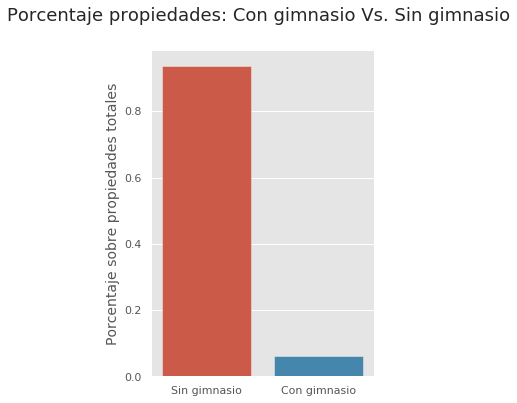

In [81]:
plt.figure(figsize=(4, 6))
ax = sns.barplot(x = ['Sin gimnasio', 'Con gimnasio'], y = gimnasios_normalized)
plt.suptitle('Porcentaje propiedades: Con gimnasio Vs. Sin gimnasio', fontsize=18)
plt.ylabel("Porcentaje sobre propiedades totales", fontsize = 14)

In [82]:
propiedades_gimnasio_tipo = pd.DataFrame()
propiedades_gimnasio_tipo['gimnasio'] = data['gimnasio'].apply(lambda x: False if x=='NaN' else x)
propiedades_gimnasio_tipo['precio_en_miles'] = data['precio']/1000
propiedades_gimnasio_tipo['tipodepropiedad'] = data['tipodepropiedad']

propiedades_gimnasio_tipo.head()

,gimnasio,precio_en_miles,tipodepropiedad
0,False,2273.0,Apartamento
1,False,3600.0,Casa en condominio
2,False,1200.0,Casa
3,False,650.0,Casa
4,False,1150.0,Apartamento


In [83]:
propiedades_gimnasio_tipo['tipodepropiedad'].unique()

array(['Apartamento', 'Casa en condominio', 'Casa', 'Terreno',
       'Terreno comercial', 'Local Comercial', 'Quinta Vacacional',
       'Oficina comercial', 'Edificio', 'Casa uso de suelo',
       'Local en centro comercial', 'Bodega comercial', 'Otros', 'Villa',
       'Duplex', 'Inmuebles productivos urbanos',
       'Departamento Compartido', 'Nave industrial', 'Rancho',
       'Terreno industrial', nan, 'Huerta', 'Lote', 'Hospedaje', 'Garage'],
      dtype=object)

In [84]:
def definir_tipo(x):
    tipos_apartamento = ['Apartamento', 'Departamento Compartido']
    if x in ['Casa en condominio', 'Casa', 'Casa uso de suelo', 'Quinta Vacacional']:
        return 'Casa'
    elif x in ['Apartamento', 'Departamento Compartido']:
        return 'Apartamento'
    return x
    
propiedades_gimnasio_tipo['tipodepropiedad'].apply(definir_tipo)
propiedades_gimnasio_def = propiedades_gimnasio_tipo.loc[propiedades_gimnasio_tipo.tipodepropiedad.isin(['Casa', 'Apartamento'])]
propiedades_gimnasio_def['count'] = 1

propiedades_gimnasio_def.head()

/home/pablo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,gimnasio,precio_en_miles,tipodepropiedad,count
0,False,2273.0,Apartamento,1
2,False,1200.0,Casa,1
3,False,650.0,Casa,1
4,False,1150.0,Apartamento,1
5,False,1100.0,Apartamento,1


In [85]:
gimnasios = propiedades_gimnasio_def.groupby(['tipodepropiedad', 'gimnasio']).agg({'count':'sum'})
gimnasios.reset_index(inplace = True)
gimnasios['gimnasio'] = gimnasios['gimnasio'].apply(lambda x: 'Con gimnasio' if x == True else 'Sin gimnasio')
gimnasios.head()

,tipodepropiedad,gimnasio,count
0,Apartamento,Sin gimnasio,49750
1,Apartamento,Con gimnasio,7591
2,Casa,Sin gimnasio,135612
3,Casa,Con gimnasio,6105


/home/pablo/.local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 23.799999999999997, 'Tipo de propiedad')

<Figure size 1152x432 with 0 Axes>

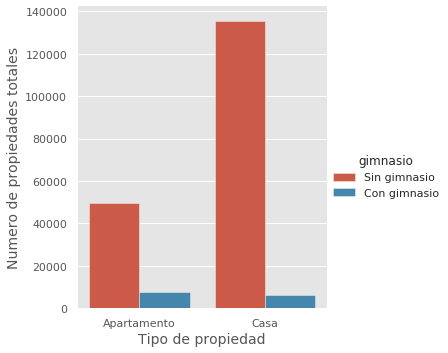

In [86]:
plt.figure(figsize=(16, 6))
plt.suptitle('Casas y apartamentos: Con gimnasio Vs. Sin gimnasio', fontsize=18)
sns.factorplot(x='tipodepropiedad', y='count', hue='gimnasio', data=gimnasios, kind='bar')
plt.ylabel("Numero de propiedades totales", fontsize = 14)
plt.xlabel("Tipo de propiedad", fontsize = 14)

/home/pablo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 23.799999999999997, 'Tipo de propiedad')

<Figure size 1152x432 with 0 Axes>

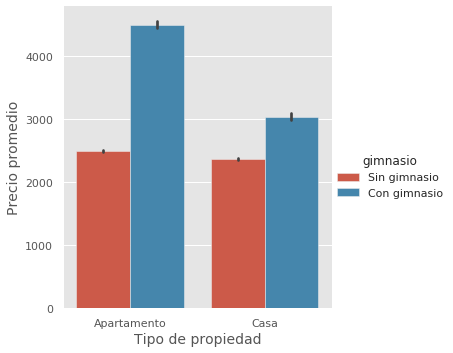

In [87]:
propiedades_gimnasio_def['gimnasio'] = propiedades_gimnasio_def['gimnasio'].apply(lambda x: 'Con gimnasio' if x == True else 'Sin gimnasio')
plt.figure(figsize=(16, 6))
plt.suptitle('Casas y apartamentos: Con gimnasio Vs. Sin gimnasio', fontsize=18)
sns.factorplot(x='tipodepropiedad', y='precio_en_miles', hue='gimnasio', data=propiedades_gimnasio_def, kind='bar')
plt.ylabel("Precio promedio", fontsize = 14)
plt.xlabel("Tipo de propiedad", fontsize = 14)

Text(0, 0.5, 'Precio propiedad promedio')

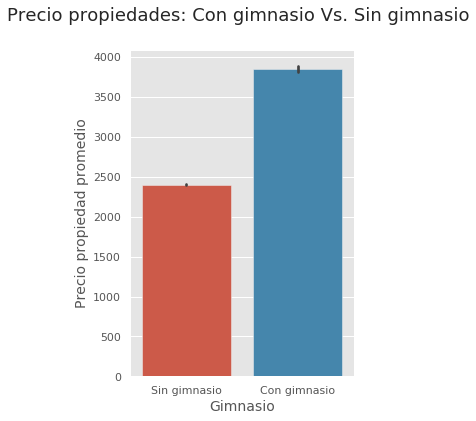

In [88]:
plt.figure(figsize=(4, 6))
ax = sns.barplot(x = propiedades_gimnasio_def.gimnasio, y = propiedades_gimnasio_def.precio_en_miles)
plt.suptitle('Precio propiedades: Con gimnasio Vs. Sin gimnasio', fontsize=18)
plt.xlabel("Gimnasio", fontsize = 14)
plt.ylabel("Precio propiedad promedio", fontsize = 14)

In [89]:
propiedades_piscina = pd.DataFrame()
propiedades_piscina['piscina'] = data['piscina'].apply(lambda x: False if x=='NaN' else x)
propiedades_piscina['tipodepropiedad'] = data['tipodepropiedad'].apply(definir_tipo)
propiedades_piscina['precio_en_miles'] = data['precio']/1000
propiedades_piscina['count'] = 1
piscinas_normalized = propiedades_piscina.piscina.value_counts(normalize = True)
piscinas_normalized

False    0.912617
True     0.087383
Name: piscina, dtype: float64

Text(0, 0.5, 'Porcentaje sobre propiedades totales')

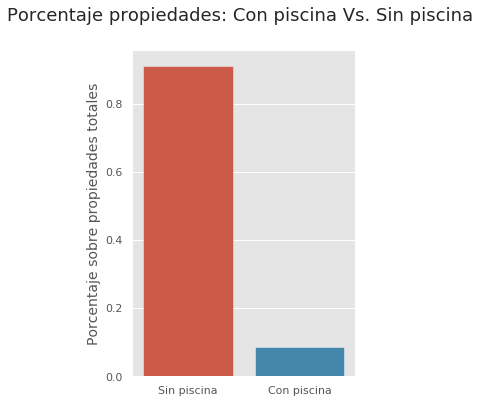

In [90]:
plt.figure(figsize=(4, 6))
ax = sns.barplot(x = ['Sin piscina', 'Con piscina'], y = piscinas_normalized)
plt.suptitle('Porcentaje propiedades: Con piscina Vs. Sin piscina', fontsize=18)
plt.ylabel("Porcentaje sobre propiedades totales", fontsize = 14)

Text(0, 0.5, 'Precio propiedad promedio')

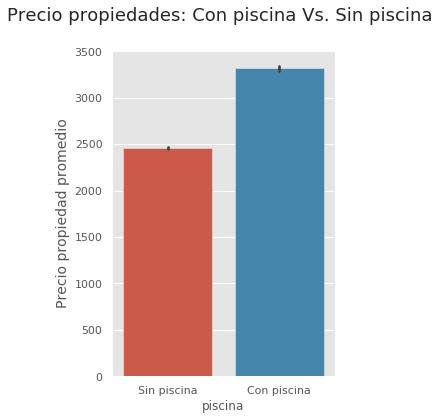

In [91]:
plt.figure(figsize=(4, 6))
ax = sns.barplot(x = propiedades_piscina.piscina, y = propiedades_piscina.precio_en_miles)
plt.suptitle('Precio propiedades: Con piscina Vs. Sin piscina', fontsize=18)
ax.set_xticklabels(['Sin piscina', 'Con piscina'])
plt.ylabel("Precio propiedad promedio", fontsize = 14)

Text(0.5, 23.799999999999997, 'Tipo de propiedad')

<Figure size 1152x432 with 0 Axes>

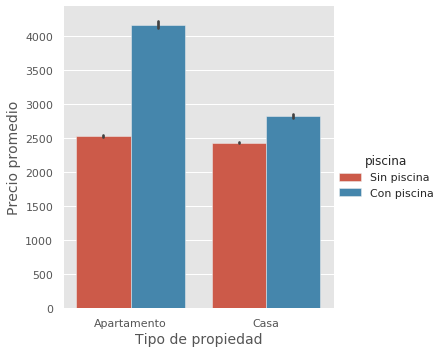

In [92]:
propiedades_piscina = propiedades_piscina.loc[propiedades_piscina.tipodepropiedad.isin(['Casa', 'Apartamento'])]

propiedades_piscina['piscina'] = propiedades_piscina['piscina'].apply(lambda x: 'Con piscina' if x == True else 'Sin piscina')
plt.figure(figsize=(16, 6))
plt.suptitle('Casas y apartamentos: Con piscina Vs. Sin piscina', fontsize=18)
sns.factorplot(x='tipodepropiedad', y='precio_en_miles', hue='piscina', data=propiedades_piscina, kind='bar')
plt.ylabel("Precio promedio", fontsize = 14)
plt.xlabel("Tipo de propiedad", fontsize = 14)

In [93]:
propiedades_piscina_count = propiedades_piscina.groupby(['tipodepropiedad', 'piscina']).agg({'count':'sum'})
propiedades_piscina_count.reset_index(inplace = True)
propiedades_piscina_count

,tipodepropiedad,piscina,count
0,Apartamento,Con piscina,8121
1,Apartamento,Sin piscina,49361
2,Casa,Con piscina,12198
3,Casa,Sin piscina,149919


Text(0.5, 23.799999999999997, 'Tipo de propiedad')

<Figure size 1152x432 with 0 Axes>

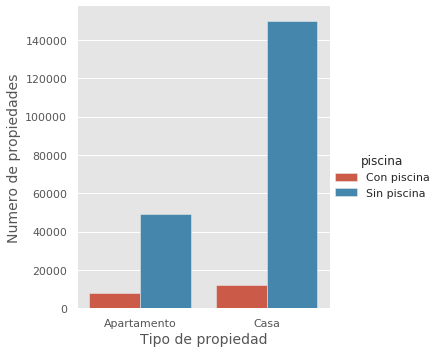

In [94]:
plt.figure(figsize=(16, 6))
plt.suptitle('Casas y apartamentos: Con piscina Vs. Sin piscina', fontsize=18)
sns.factorplot(x='tipodepropiedad', y='count', hue='piscina', data=propiedades_piscina_count, kind='bar')
plt.ylabel("Numero de propiedades", fontsize = 14)
plt.xlabel("Tipo de propiedad", fontsize = 14)

In [95]:
propiedades_usosmultiples = pd.DataFrame()
propiedades_usosmultiples['usosmultiples'] = data['usosmultiples'].apply(lambda x: False if x=='NaN' else x)
propiedades_usosmultiples['tipodepropiedad'] = data['tipodepropiedad'].apply(definir_tipo)
propiedades_usosmultiples['precio_en_miles'] = data['precio']/1000
propiedades_usosmultiples['count'] = 1
propiedades_usosmultiples = propiedades_usosmultiples.loc[propiedades_usosmultiples.tipodepropiedad == 'Apartamento']
usosmultiples_normalized = propiedades_usosmultiples.usosmultiples.value_counts(normalize = True)
usosmultiples_normalized

False    0.891914
True     0.108086
Name: usosmultiples, dtype: float64

Text(0, 0.5, 'Porcentaje')

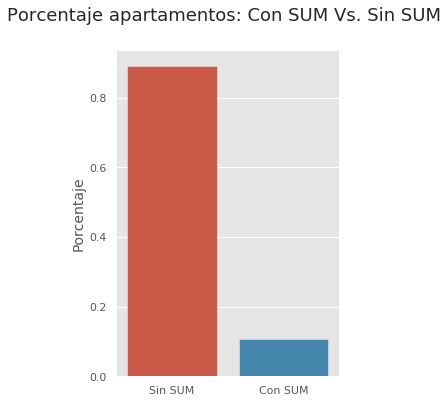

In [96]:
plt.figure(figsize=(4, 6))
ax = sns.barplot(x = ['Sin SUM', 'Con SUM'], y = usosmultiples_normalized)
plt.suptitle('Porcentaje apartamentos: Con SUM Vs. Sin SUM', fontsize=18)
plt.ylabel("Porcentaje", fontsize = 14)

Text(0, 0.5, 'Precio propiedad promedio')

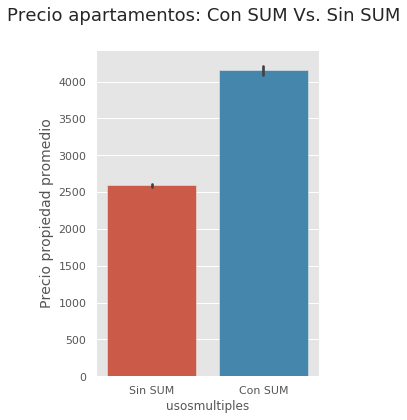

In [97]:
plt.figure(figsize=(4, 6))
ax = sns.barplot(x = propiedades_usosmultiples.usosmultiples, y = propiedades_usosmultiples.precio_en_miles)
plt.suptitle('Precio apartamentos: Con SUM Vs. Sin SUM', fontsize=18)
ax.set_xticklabels(['Sin SUM', 'Con SUM'])
plt.ylabel("Precio propiedad promedio", fontsize = 14)

In [98]:
propiedades_escuelas = pd.DataFrame()
propiedades_escuelas['escuelascercanas'] = data['escuelascercanas'].apply(lambda x: False if x=='NaN' else x)
propiedades_escuelas['tipodepropiedad'] = data['tipodepropiedad'].apply(definir_tipo)
propiedades_escuelas['precio_en_miles'] = data['precio']/1000
propiedades_escuelas['count'] = 1
propiedades_escuelas_normalized = propiedades_escuelas.escuelascercanas.value_counts(normalize = True)
propiedades_escuelas_normalized

False    0.555858
True     0.444142
Name: escuelascercanas, dtype: float64

Text(0, 0.5, 'Porcentaje')

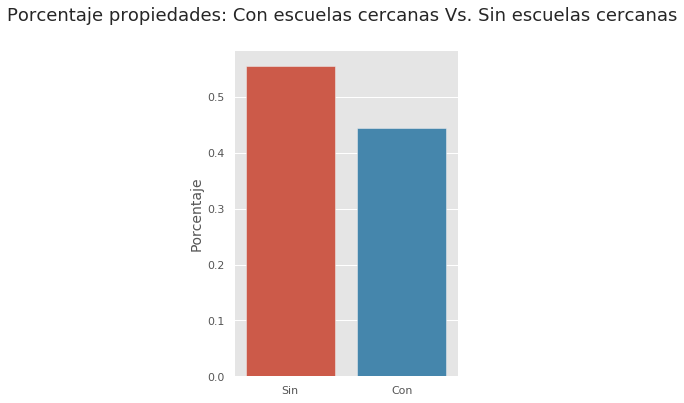

In [115]:
plt.figure(figsize=(4, 6))
ax = sns.barplot(x = ['Sin', 'Con'], y = propiedades_escuelas_normalized)
plt.suptitle('Porcentaje propiedades: Con escuelas cercanas Vs. Sin escuelas cercanas', fontsize=18)
plt.ylabel("Porcentaje", fontsize = 14)

In [100]:
propiedades_escuelas.head()

,escuelascercanas,tipodepropiedad,precio_en_miles,count
0,False,Apartamento,2273.0,1
1,True,Casa,3600.0,1
2,False,Casa,1200.0,1
3,True,Casa,650.0,1
4,False,Apartamento,1150.0,1


Text(0.5, 1.0, 'Cercania a escuelas por tipo de propiedad')

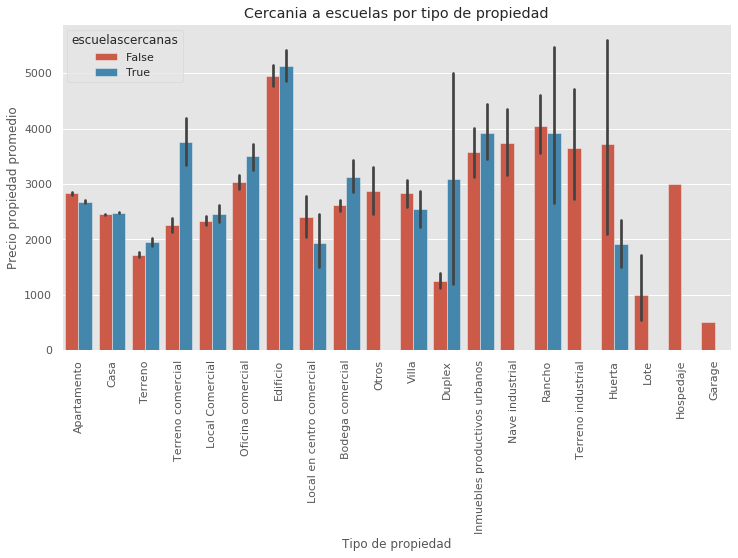

In [101]:
plt.figure(figsize=(12, 6))
sns.barplot(x='tipodepropiedad', y='precio_en_miles', hue='escuelascercanas', data=propiedades_escuelas)
plt.xticks(rotation=90)
plt.ylabel('Precio propiedad promedio')
plt.xlabel('Tipo de propiedad')
plt.title('Cercania a escuelas por tipo de propiedad')

In [106]:
propiedades_escuelas_count = propiedades_escuelas.groupby(['tipodepropiedad', 'escuelascercanas']).agg({'count':'sum'})
propiedades_escuelas_count.reset_index(inplace = True)
propiedades_escuelas_count['count'] = np.log(propiedades_escuelas_count['count'])

Text(0.5, 1.0, 'Cercania a escuelas por tipo de propiedad')

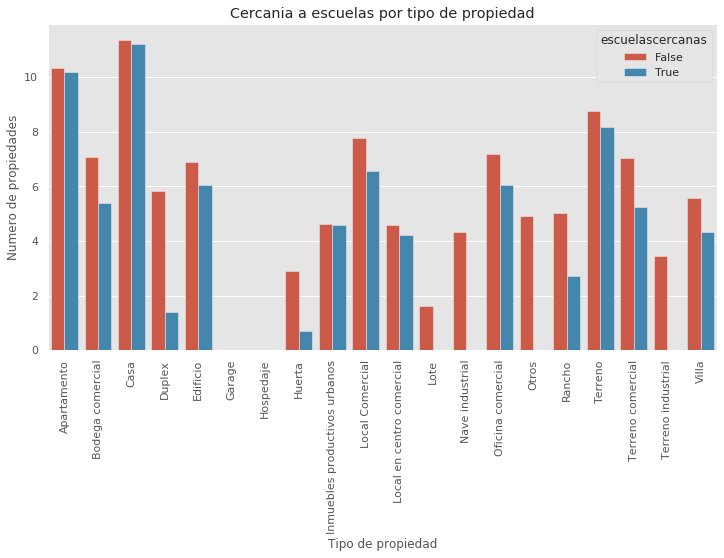

In [107]:
plt.figure(figsize=(12, 6))
sns.barplot(x='tipodepropiedad', y='count', hue='escuelascercanas', data=propiedades_escuelas_count)
plt.xticks(rotation=90)
plt.ylabel('Numero de propiedades')
plt.xlabel('Tipo de propiedad')
plt.title('Cercania a escuelas por tipo de propiedad')

Text(0.5, 1.0, 'Cercania a escuelas por tipo de propiedad')

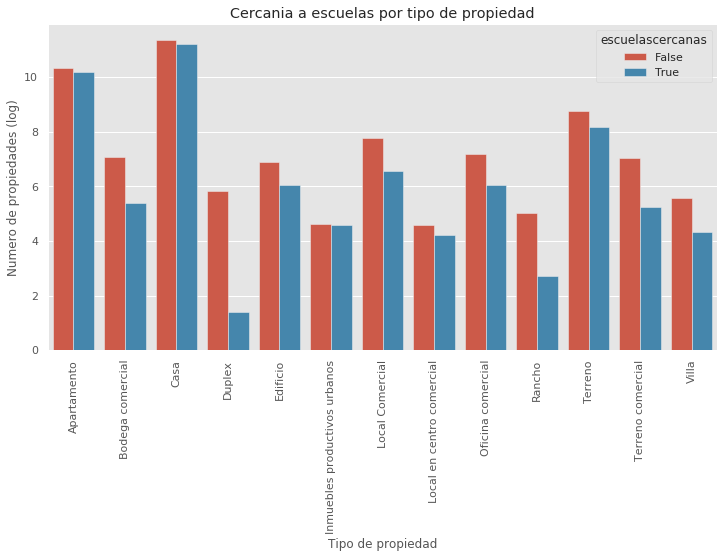

In [108]:
prop = ['Apartamento', 'Bodega comercial', 'Casa', 'Duplex', 'Edificio', 'Inmuebles productivos urbanos',
        'Local Comercial', 'Local en centro comercial', 'Oficina comercial', 'Rancho', 'Terreno', 'Terreno comercial', 'Villa']

df = propiedades_escuelas_count.loc[propiedades_escuelas_count.tipodepropiedad.isin(prop)]

plt.figure(figsize=(12, 6))
sns.barplot(x='tipodepropiedad', y='count', hue='escuelascercanas', data=df)
plt.xticks(rotation=90)
plt.ylabel('Numero de propiedades (log)')
plt.xlabel('Tipo de propiedad')
plt.title('Cercania a escuelas por tipo de propiedad')

In [109]:
propiedades_cc = pd.DataFrame()
propiedades_cc['centroscomercialescercanos'] = data['centroscomercialescercanos'].apply(lambda x: False if x=='NaN' else x)
propiedades_cc['tipodepropiedad'] = data['tipodepropiedad'].apply(definir_tipo)
propiedades_cc['precio_en_miles'] = data['precio']/1000
propiedades_cc['count'] = 1
propiedades_cc_normalized = propiedades_cc.centroscomercialescercanos.value_counts(normalize = True)
propiedades_cc_normalized

False    0.603467
True     0.396533
Name: centroscomercialescercanos, dtype: float64

Text(0, 0.5, 'Porcentaje')

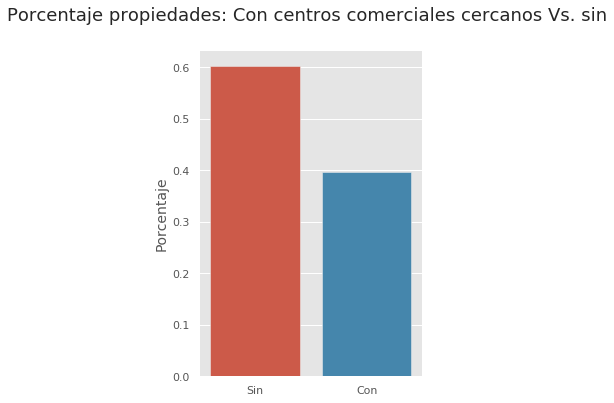

In [114]:
plt.figure(figsize=(4, 6))
ax = sns.barplot(x = ['Sin', 'Con'], y = propiedades_cc_normalized)
plt.suptitle('Porcentaje propiedades: Con centros comerciales cercanos Vs. sin', fontsize=18)
plt.ylabel("Porcentaje", fontsize = 14)

In [116]:
propiedades_cc.head()

,centroscomercialescercanos,tipodepropiedad,precio_en_miles,count
0,False,Apartamento,2273.0,1
1,True,Casa,3600.0,1
2,False,Casa,1200.0,1
3,True,Casa,650.0,1
4,False,Apartamento,1150.0,1


Text(0.5, 1.0, 'Cercania a centros comerciales por tipo de propiedad')

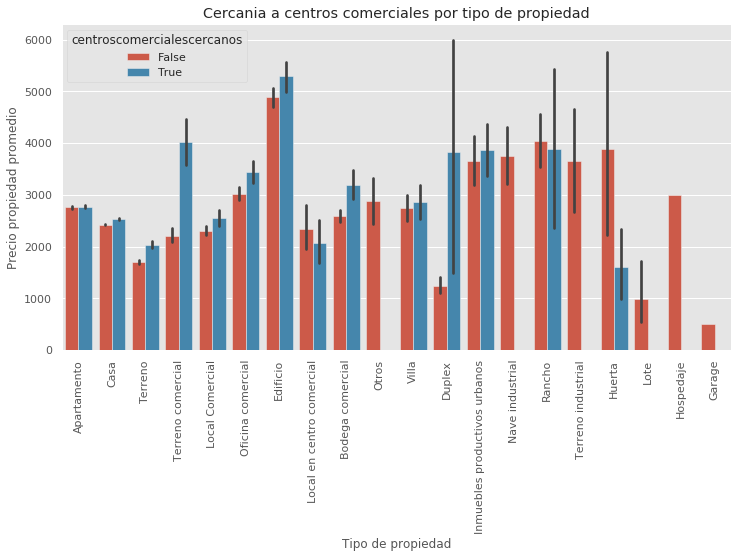

In [117]:
plt.figure(figsize=(12, 6))
sns.barplot(x='tipodepropiedad', y='precio_en_miles', hue='centroscomercialescercanos', data=propiedades_cc)
plt.xticks(rotation=90)
plt.ylabel('Precio propiedad promedio')
plt.xlabel('Tipo de propiedad')
plt.title('Cercania a centros comerciales por tipo de propiedad')

In [118]:
propiedades_cc_count = propiedades_cc.groupby(['tipodepropiedad', 'centroscomercialescercanos']).agg({'count':'sum'})
propiedades_cc_count.reset_index(inplace = True)
propiedades_cc_count['count'] = np.log(propiedades_cc_count['count'])

Text(0.5, 1.0, 'Cercania a escuelas por tipo de propiedad')

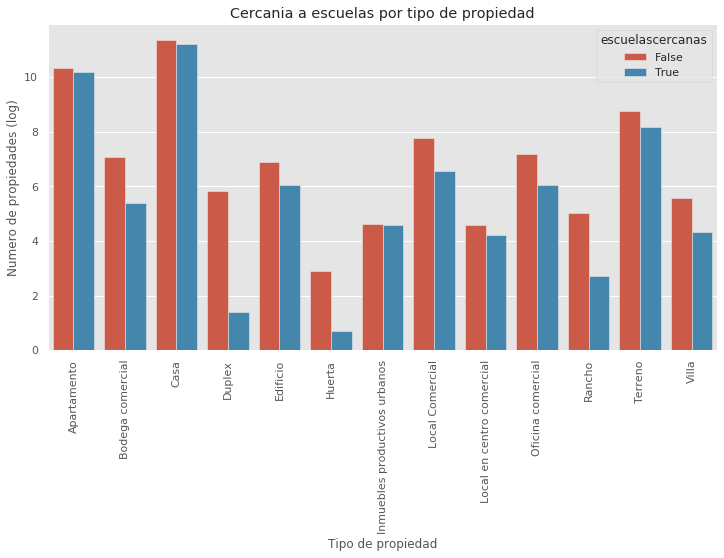

In [119]:
prop = ['Apartamento', 'Casa', 'Terreno', 'Terreno comerrcial', 'Local Comercial', 'Oficina comercial',
        'Edificio', 'Local en centro comercial', 'Bodega comercial', 'Villa', 'Duplex', 'Inmuebles productivos urbanos',
        'Rancho', 'Huerta']

df = propiedades_escuelas_count.loc[propiedades_escuelas_count.tipodepropiedad.isin(prop)]

plt.figure(figsize=(12, 6))
sns.barplot(x='tipodepropiedad', y='count', hue='escuelascercanas', data=df)
plt.xticks(rotation=90)
plt.ylabel('Numero de propiedades (log)')
plt.xlabel('Tipo de propiedad')
plt.title('Cercania a escuelas por tipo de propiedad')